[View in Colaboratory](https://colab.research.google.com/github/MicroprocessorX069/Keypoint-detection-of-Image/blob/master/Keypoint_detection_.ipynb)

In [0]:
from google.colab import drive
drive.mount('/gdrive')

458 750


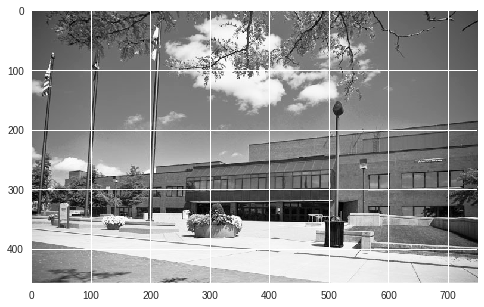

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
#uploading file from local system

#from google.colab import files
#uploaded = files.upload()
#reading the image using cv2.imread

input_image=cv2.imread("task2.jpg",0) #make sure the path to the image is in String format
for x in range(len(input_image)):
  for y in range(len(input_image[0])):
      input_image[x,y]=255-input_image[x,y]
plt.imshow(input_image) 
print(len(input_image),len(input_image[0]))
#plt.imshow(input_image)



Function for creating gaussian blur kernel

In [0]:
import numpy as np
import scipy.stats as st

def gkern(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel array."""

    interval = (2*nsig+1.)/(kernlen)  
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel
#plt.imshow(gkern(21,10))

def create_octave(mat):
  row_indices=[]
  row_index=0
  while(row_index<len(mat)):
    row_indices.append(row_index)
    row_index=row_index+2
  
  col_indices=[]
  col_index=0
  while(col_index<len(mat[0])):
    col_indices.append(col_index)
    col_index=col_index+2
  
  mat2=np.delete(mat,row_indices,axis=0)
  mat2=np.delete(mat2,col_indices,axis=1)
  return(mat2)

import numpy as np
def gaussian_blur(input_image,sig):
    kernel=gkern(7,sig)
    input_image=np.array(input_image)
    padded_input=np.pad(input_image,(int((len(kernel))/2),int((len(kernel))/2)),'constant')
    padded_input=np.array(padded_input)
    new_image=np.zeros((len(input_image),len(input_image[0])))
    for input_x in range(int((len(kernel))/2),(len(padded_input)-int((len(kernel))/2))):
      for input_y in range(int((len(kernel))/2),(len(padded_input[0])-int((len(kernel))/2))):
          #padded_input[input_x,input_y]=0
          padded_input_slice=padded_input[input_x-int((len(kernel))/2):input_x+int((len(kernel))/2)+1,input_y-int((len(kernel[0]))/2):input_y+int((len(kernel[0]))/2)+1]
          product_mat=np.multiply(padded_input_slice,kernel)
          new_image[input_x-int((len(kernel))/2),input_y-int((len(kernel))/2)]=np.sum(product_mat)       
                 #new_image[input_x-int((len(kernel))/2),input_y-int((len(kernel))/2)]=padded_input[input_x,input_y]+padded_input[input_x+kernel_x-int((len(kernel))/2), input_y+kernel_y-int((len(kernel))/2)]*kernel[kernel_x,kernel_y]
    return(new_image)   
  
def negative(input_image):
  #new_image2=np.zeros((len(input_image),len(input_image[0])))
  for x in range(len(input_image)):
     for y in range(len(input_image[0])):
         input_image[x,y]=255-input_image[x,y]
  return(input_image)


Developing 4 octaves

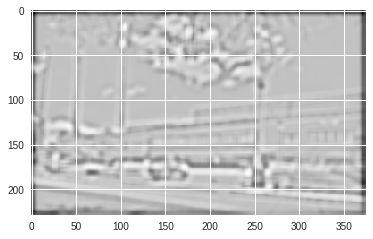

In [48]:
import numpy as np
gaussian_sig=np.array([[1/pow(2,0.5),1,pow(2,0.5),2,2*pow(2,0.5)],[pow(2,0.5),2,2*pow(2,0.5),4,4*pow(2,0.5)],[2*pow(2,0.5),4,4*pow(2,0.5),8,8*pow(2,0.5)],[4*pow(2,0.5),8,8*pow(2,0.5),16,16*pow(2,0.5)]])
 
#1st Octave
oct_one=create_octave(input_image)

oct_one_blur_one=gaussian_blur(oct_one,gaussian_sig[0,0])
oct_one_blur_two=gaussian_blur(oct_one_blur_one,gaussian_sig[0,1])
oct_one_blur_three=gaussian_blur(oct_one_blur_two,gaussian_sig[0,2])
oct_one_blur_four=gaussian_blur(oct_one_blur_three,gaussian_sig[0,3])
oct_one_blur_five=gaussian_blur(oct_one_blur_four,gaussian_sig[0,4])

oct_one_dog_one=np.subtract(oct_one_blur_one,oct_one_blur_two)
oct_one_dog_two=np.subtract(oct_one_blur_two,oct_one_blur_three)
oct_one_dog_three=np.subtract(oct_one_blur_three,oct_one_blur_four)
oct_one_dog_four=np.subtract(oct_one_blur_four,oct_one_blur_five)


#plt.imshow(oct_one_blur_three)
#dog_array=np.array([[oct_one_dog_one,oct_one_dog_two,oct_one_dog_three,oct_one_dog_four]])
#lt.imshow((oct_one_dog_one,oct_one_dog_two,oct_one_dog_three,oct_one_dog_four))


#2nd Octave
oct_two=create_octave(oct_one)

oct_two_blur_one=gaussian_blur(oct_two,gaussian_sig[1,0])
oct_two_blur_two=gaussian_blur(oct_two_blur_one,gaussian_sig[1,1])
oct_two_blur_three=gaussian_blur(oct_two_blur_two,gaussian_sig[1,2])
oct_two_blur_four=gaussian_blur(oct_two_blur_three,gaussian_sig[1,3])
oct_two_blur_five=gaussian_blur(oct_two_blur_four,gaussian_sig[1,4])

oct_two_dog_one=np.subtract(oct_two_blur_one,oct_two_blur_two)
oct_two_dog_two=np.subtract(oct_two_blur_two,oct_two_blur_three)
oct_two_dog_three=np.subtract(oct_two_blur_three,oct_two_blur_four)
oct_two_dog_four=np.subtract(oct_two_blur_four,oct_two_blur_five)


#3rd Octave
oct_three=create_octave(oct_two)

oct_three_blur_one=gaussian_blur(oct_three,gaussian_sig[1,0])
oct_three_blur_two=gaussian_blur(oct_three_blur_one,gaussian_sig[1,1])
oct_three_blur_three=gaussian_blur(oct_three_blur_two,gaussian_sig[1,2])
oct_three_blur_four=gaussian_blur(oct_three_blur_three,gaussian_sig[1,3])
oct_three_blur_five=gaussian_blur(oct_three_blur_four,gaussian_sig[1,4])

oct_three_dog_one=np.subtract(oct_three_blur_one,oct_three_blur_two)
oct_three_dog_two=np.subtract(oct_three_blur_two,oct_three_blur_three)
oct_three_dog_three=np.subtract(oct_three_blur_three,oct_three_blur_four)
oct_three_dog_four=np.subtract(oct_three_blur_four,oct_three_blur_five)

#2nd Octave
oct_four=create_octave(oct_three)

oct_four_blur_one=gaussian_blur(oct_four,gaussian_sig[1,0])
oct_four_blur_two=gaussian_blur(oct_four_blur_one,gaussian_sig[1,1])
oct_four_blur_three=gaussian_blur(oct_four_blur_two,gaussian_sig[1,2])
oct_four_blur_four=gaussian_blur(oct_four_blur_three,gaussian_sig[1,3])
oct_four_blur_five=gaussian_blur(oct_four_blur_four,gaussian_sig[1,4])

oct_four_dog_one=np.subtract(oct_four_blur_one,oct_four_blur_two)
oct_four_dog_two=np.subtract(oct_four_blur_two,oct_four_blur_three)
oct_four_dog_three=np.subtract(oct_four_blur_three,oct_four_blur_four)
oct_four_dog_four=np.subtract(oct_four_blur_four,oct_four_blur_five)

dog_array=np.array([[oct_one_dog_one,oct_one_dog_two,oct_one_dog_three,oct_one_dog_four],[oct_two_dog_one,oct_two_dog_two,oct_two_dog_three,oct_two_dog_four],[oct_three_dog_one,oct_three_dog_two,oct_one_dog_three,oct_three_dog_four],[oct_four_dog_one,oct_four_dog_two,oct_four_dog_three,oct_four_dog_four]])
plt.imshow(oct_one_dog_two)
#print(oct_two_dog_two)

In [59]:
print(dog_array[0,1])

[[12.13371355 14.57209724 16.64504398 ... 16.09565939 14.08923871
  11.73159815]
 [14.5726136  17.16273488 19.27520469 ... 18.58542436 16.54965264
  14.05733275]
 [16.64348545 19.27275569 21.31895749 ... 20.45978928 18.5080316
  16.00505063]
 ...
 [14.39897155 16.62794014 18.34667183 ... 11.50495022 10.49324661
   9.09677632]
 [12.66007041 14.87729094 16.67837525 ... 10.13512076  9.12726209
   7.81248147]
 [10.54503797 12.63483915 14.40704747 ...  8.41556342  7.46283668
   6.28569912]]


In [0]:
# Gives pixel coordinates in input image assuming its octave no is zero.
def find_og_xy(x ,y,oct_no):
  #m=len(prev_img[0])
  #n=len(prev_img)
  
  if(oct_no>1):
    oct_no=oct_no-1
    new_x=2*x+1
    new_y=2*y+1
    final_x,final_y=find_og_xy(new_x,new_y,oct_no)
  else:
    final_x=2*x+1
    final_y=2*y+1
  return(final_x,final_y)


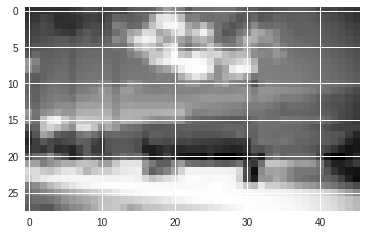

In [22]:
plt.imshow(oct_four)

In [50]:
a=np.array([[1,2,3],[2,2,2]])
b=np.array([[5,2,6],[5,2,6]])
c=np.array([0,0,0])
np.append(a,b)

array([1, 2, 3, 2, 2, 2, 5, 2, 6, 5, 2, 6])

223


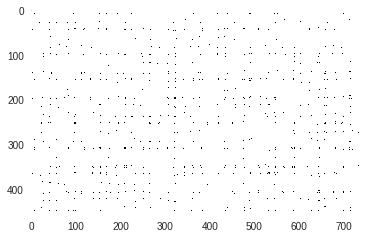

In [47]:
%matplotlib inline
import re
import numpy as np
#np.set_printoptions(threshold=np.nan)
def find_mark_keypoints(original_img, oct_no, middle_layer_no, iterator_len):
  
  oct_no=oct_no-1
  middle_layer_no=middle_layer_no-1
  
  # Temporary input image. So the original image is not tampered
  original_img_temp=np.zeros(original_img.shape)
  
  #Initializing 3 DoGs above mid and below the middle layer
  oct_img1=dog_array[oct_no,middle_layer_no-1]
  oct_img2=dog_array[oct_no,middle_layer_no]
  oct_img3=dog_array[oct_no,middle_layer_no+1]
  
  
  # Temporary DoG max min image. So the original image is not tampered
  oct_img_temp=np.array(oct_img2)
  
  # Initialising 3 sub matrix of neigbours of size iterator_len
  new_oct_img=np.zeros((len(oct_img2),len(oct_img2[0])))
  
  #print(len(oct_img2),len(oct_img2[0]))
  oct_img_x,oct_img_y=0,0
  print(len(oct_img2)-iterator_len+1)
  #for oct_img_x in range(len(oct_img2)-iterator_len+1):
  while(oct_img_x<len(oct_img2)-iterator_len+1):
    #for oct_img_y in range(len(oct_img2[0])-iterator_len+1):
    oct_img_y=0
    while(oct_img_y<len(oct_img2[0])-iterator_len+1):
      #print(oct_img_x,oct_img_y)
      new_oct_img1=(oct_img1[oct_img_x:oct_img_x+iterator_len,oct_img_y:oct_img_y+iterator_len])
      max1=np.amax(new_oct_img1)
      new_oct_img2=(oct_img2[oct_img_x:oct_img_x+iterator_len,oct_img_y:oct_img_y+iterator_len])
      max2=np.amax(new_oct_img2)
      new_oct_img3=(oct_img3[oct_img_x:oct_img_x+iterator_len,oct_img_y:oct_img_y+iterator_len])
      max3=np.amax(new_oct_img3)
      
      # Checking the max value out for the three DoG Matrices for Top medium and lower level each
      if(max1>max2 and max1>max3):
        new_oct_mat=new_oct_img1
        
      elif(max2>max1 and max2>max3):
        new_oct_mat=new_oct_img2
        
      else:
        new_oct_mat=new_oct_img3
       
      max_x,max_y=np.unravel_index(new_oct_mat.argmax(), new_oct_mat.shape)
      max_x=max_x+oct_img_x
      max_y=max_y+oct_img_y
      max_x,max_y=find_og_xy(max_x,max_y,oct_no+1)
      #rint(max_x,max_y)
      if(max_x<458 and max_y< 749):
        original_img_temp[max_x,max_y]=255
        
      min1=np.amin(new_oct_img1)
      min2=np.amin(new_oct_img2)
      min3=np.amin(new_oct_img3)
      
      # Checking the min value out for the three DoG Matrices for Top medium and lower level each
      if(min1<min2 and min1<min3):
        new_oct_mat=new_oct_img1
        
      elif(min2<min1 and min2<min3):
        new_oct_mat=new_oct_img2
        
      else:
        new_oct_mat=new_oct_img3
       
      min_x,min_y=np.unravel_index(new_oct_mat.argmin(), new_oct_mat.shape)
      min_x=min_x+oct_img_x
      min_y=min_y+oct_img_y
      min_x,min_y=find_og_xy(min_x,min_y,oct_no+1)
      #rint(min_x,min_y)
      if(min_x<458 and min_y< 749):
        original_img_temp[min_x,min_y]=255
      oct_img_y=oct_img_y+iterator_len     
    oct_img_x=oct_img_x+iterator_len 
  
  return(original_img_temp)   



original_img_temp=input_image
'''
for i in range(1,4):
    original_img_temp=np.array(find_mark_keypoints(original_img_temp,i,2,7))
    original_img_temp=find_mark_keypoints(original_img_temp,i,3,7)
'''
original_img_temp=np.array(find_mark_keypoints(original_img_temp,1,3,7))
#original_img_temp=np.array(find_mark_keypoints(original_img_temp,1,3,7))
plt.imshow(original_img_temp)

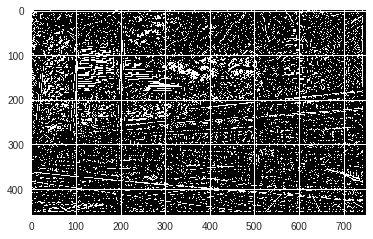

In [39]:
plt.imshow(negative(original_img_temp))


Gaussian kernel[1]

**References**

[1] https://stackoverflow.com/questions/29731726/how-to-calculate-a-gaussian-kernel-matrix-efficiently-in-numpy